In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

In [1]:
#reading the loss in the log file
f=open(r'F:\Users\ericl\Documents\GitHub\Image-Inpainting\results\loss_train_network.log','r')
text=f.read()
test=text.split('\n')
#important  因为log里面可能记录了多次的数据，得挑一下从50minibatch到最后的
#这里是唯一一点需要手动调的地方
testdata=test[:]

In [22]:
loss_G=[]
loss_fake_D=[]
loss_real_D=[]
for i in range(len(testdata)-1):
    temp=json.loads(testdata[i])
    #选多少个点来画图？
    if temp['step'] in [1,200,400,600,800] :
        loss_G.append(temp['loss_G'])
        loss_fake_D.append(temp['loss_fake_D'])
        loss_real_D.append(temp['loss_real_D'])

In [23]:
loss_G=np.array(loss_G)
loss_fake_D=np.array(loss_fake_D)
loss_real_D=np.array(loss_real_D)

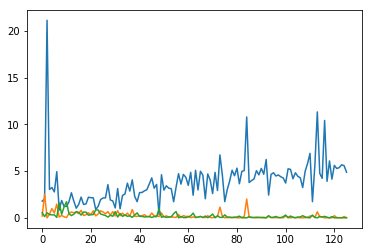

In [24]:
plt.plot(loss_G)
plt.plot(loss_fake_D)
plt.plot(loss_real_D)

## 画人像

In [3]:
import cv2

In [28]:
image=cv2.imread(r'F:\Users\ericl\Documents\GitHub\Image-Inpainting\results\sample_fake_images_epoch000_test.png')

In [49]:
testimage=np.array([])
#每张人像约等于66*66
for i in range(10):
    image=cv2.imread(r'F:\Users\ericl\Documents\GitHub\Image-Inpainting\results\sample_fake_images_epoch%03d_%s.png'%(i,'test'))
    cropped=image[0:264, 0:66]
    if len(testimage)==0:
        testimage=cropped
    else:
        
        testimage=np.hstack((testimage,cropped))

In [50]:
cv2.imshow('tsest',testimage)
cv2.waitKey(0) 

-1

In [18]:
cv2.imwrite('test.png',cropped)

True

## 到此结束

In [6]:
for i in range(len(testdata)):
    temp=testdata[i].split(',')
    testdata[i]=temp
    

In [7]:
train_loss=[]
valid_loss=[]

for i in range(len(testdata)-1):
    #print(testdata[i])
    loss=float(testdata[i][1][8:])
    step=testdata[i][2][8:]
    if '_val' in step:
        step=int(step[step.index('"')+1:step.index('_val')])
        #valid_loss[step]=loss
        valid_loss.append(loss)
    else:
        step=int(step[:step.index('}')])
        #train_loss[step]=loss
        train_loss.append(loss)
    #print(train_loss[step])

In [8]:
train_loss=np.array(train_loss)
valid_loss=np.array(valid_loss)

In [9]:
x=np.linspace(0,len(train_loss)*50,len(train_loss))

In [10]:
val_x=np.linspace(0,len(valid_loss)*200,len(valid_loss) )

Text(0,0.5,'MSE Loss')

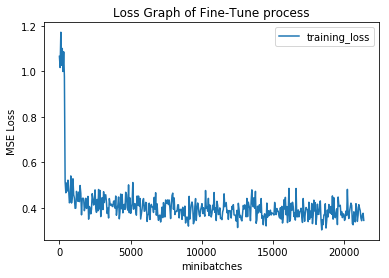

In [12]:
#plt.plot(val_x,valid_loss,label='validation_loss')
plt.plot(x,train_loss,label='training_loss')
plt.legend()
plt.title('Loss Graph of Fine-Tune process')
plt.xlabel('minibatches')
plt.ylabel('MSE Loss')